In [ ]:
# !pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (48000, 28, 28)
y_train shape: (48000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [ ]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

Batch of Images Shape: (16, 28, 28)
Batch of Labels: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


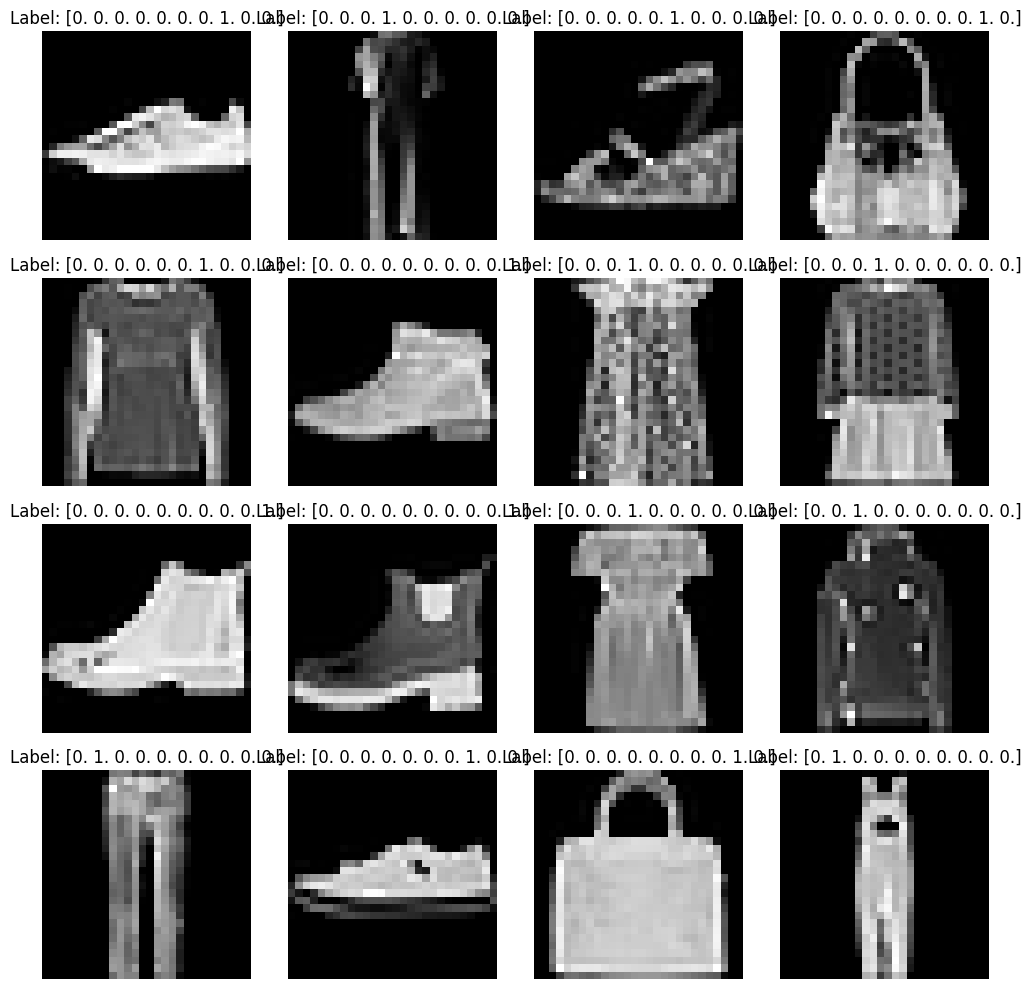

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 16
images = x_train[:batch_size]
labels = y_train[:batch_size]

print("Batch of Images Shape:", images.shape)  # (16, 28, 28)
print("Batch of Labels:", labels)  # Print the first 16 labels

# Visualize the batch
plt.figure(figsize=(10, 10))
for i in range(batch_size):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
def create_model(optimizer, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'SGD':
       optimizer_instance = SGD(learning_rate=learning_rate)
    elif optimizer == 'Adam':
       optimizer_instance = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
       optimizer_instance = RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer_instance, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Optimizers and learning rates
optimizers = ['Adam', 'SGD', 'RMSprop']
learning_rates = [0.01, 0.001, 0.0001]

# Dictionaries to store history and models
hist_dict = {}
model_dict = {}

# Loop over each optimizer and learning rate
for optimizer in optimizers:
    for lr in learning_rates:
        # Unique key for each combination
        key = f"{optimizer}_lr_{lr}"

        # Create and compile the model
        model = create_model(optimizer, lr)

        # Train the model
        print(f"Training model with {key}...")
        history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

        print(f"Optimizer: {optimizer}, Learning Rate: {lr}")
        print(f"Training Loss: {history.history['loss'][-1]}, Training Accuracy: {history.history['accuracy'][-1]}")
        print("---------------------------------------------------------------------------------------------------")

        # Store history and model in dictionaries
        hist_dict[key] = history.history
        model_dict[key] = model

Training model with Adam_lr_0.01...
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1574 - loss: 28.6907 - val_accuracy: 0.2069 - val_loss: 2.0450
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2060 - loss: 2.0577 - val_accuracy: 0.1983 - val_loss: 2.0562
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2313 - loss: 1.9860 - val_accuracy: 0.1017 - val_loss: 2.3211
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0997 - loss: 2.3048 - val_accuracy: 0.0997 - val_loss: 2.3038
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0986 - loss: 2.3038 - val_accuracy: 0.1020 - val_loss: 2.3047
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1017 - loss: 2.3041 - val_accuracy: 0.0981 - val_loss: 2.3037
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1064 - loss: 2.3036 - val_accuracy: 0.1026 - val_loss: 2.3038
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0973 - loss: 2.3042 - val_accura

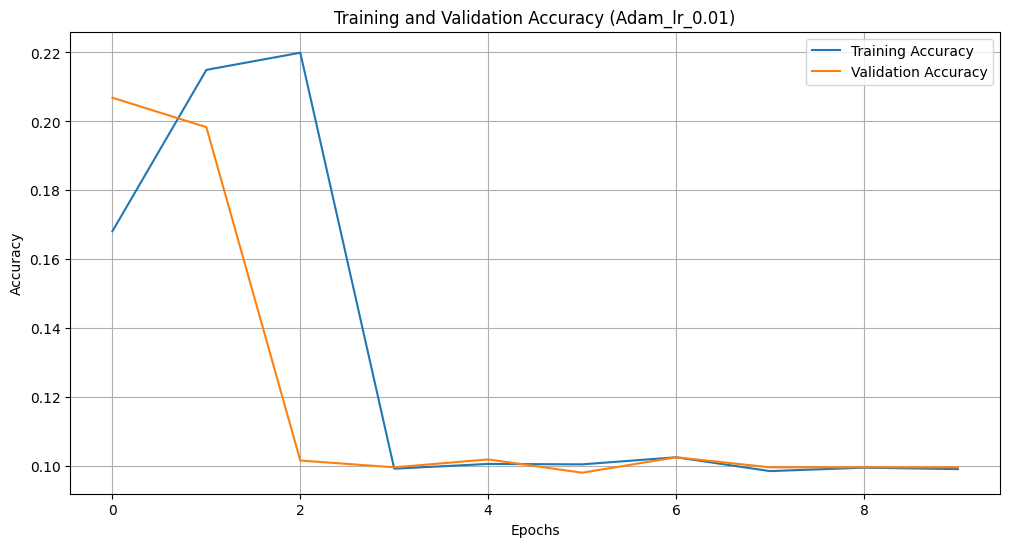

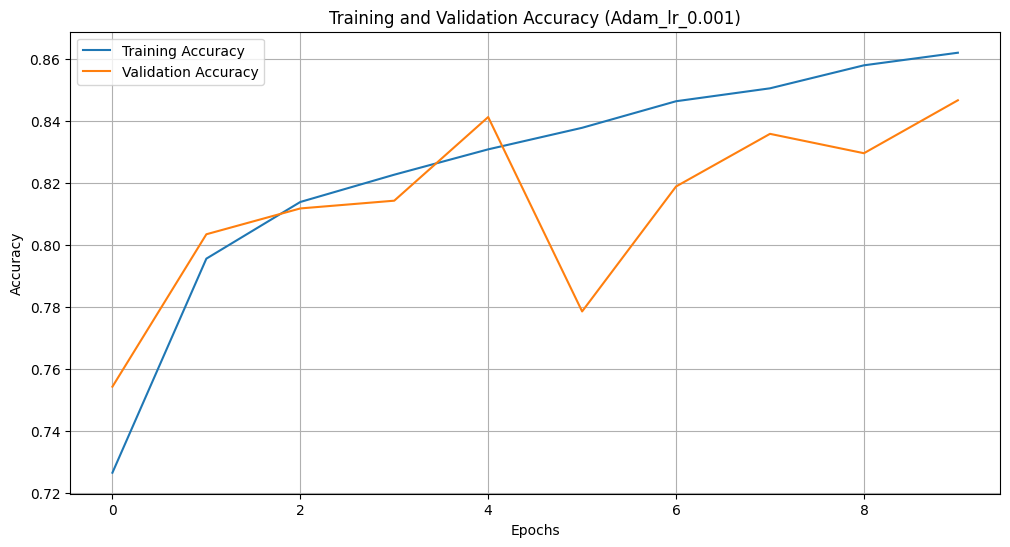

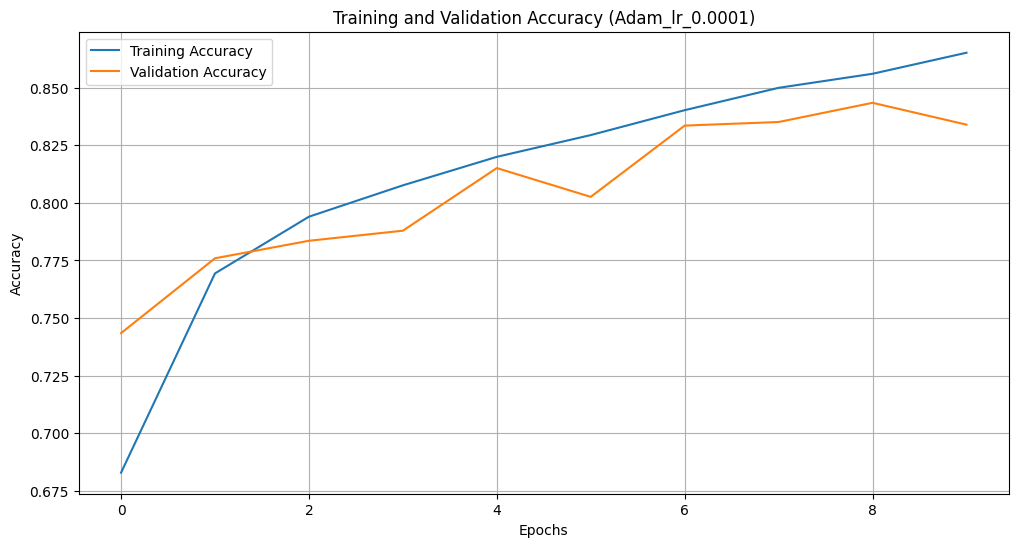

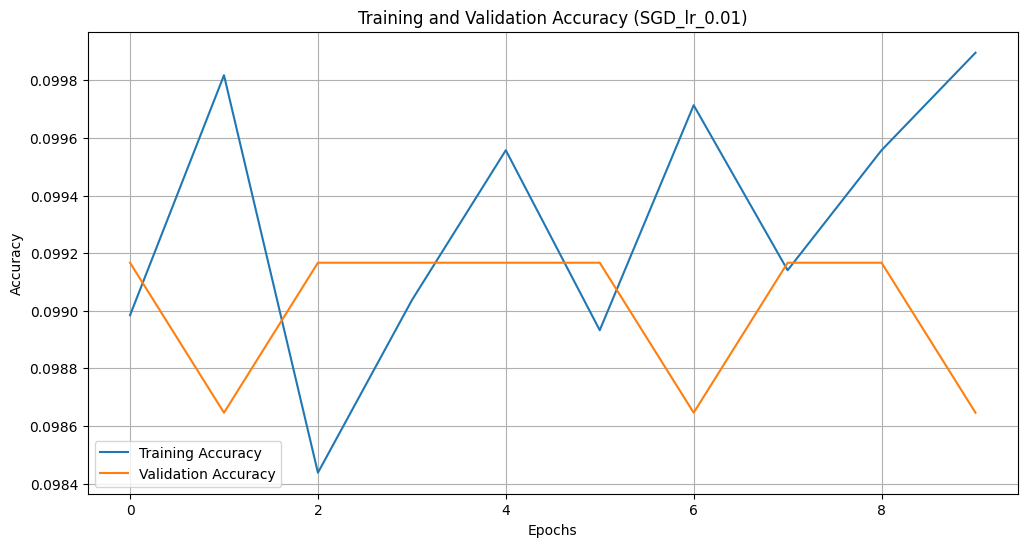

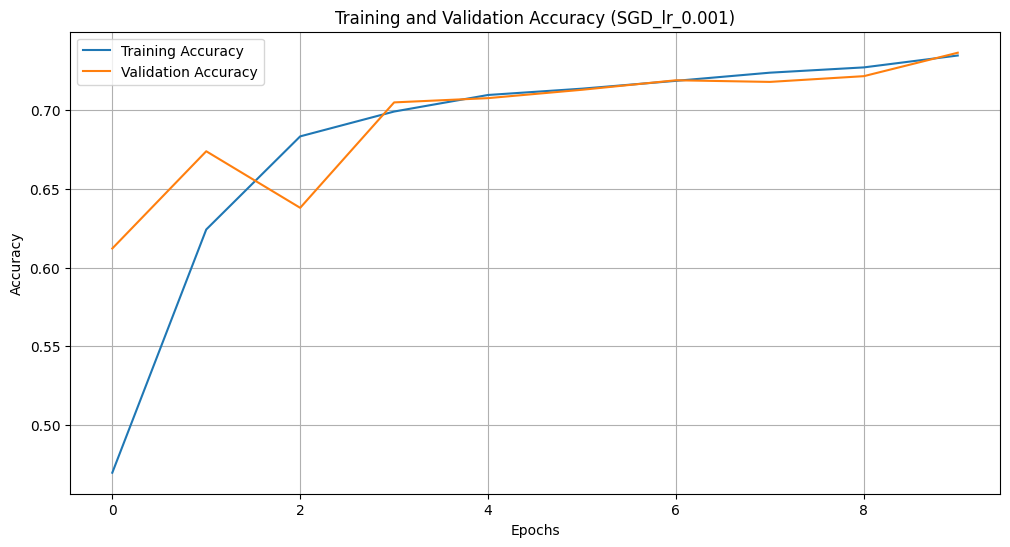

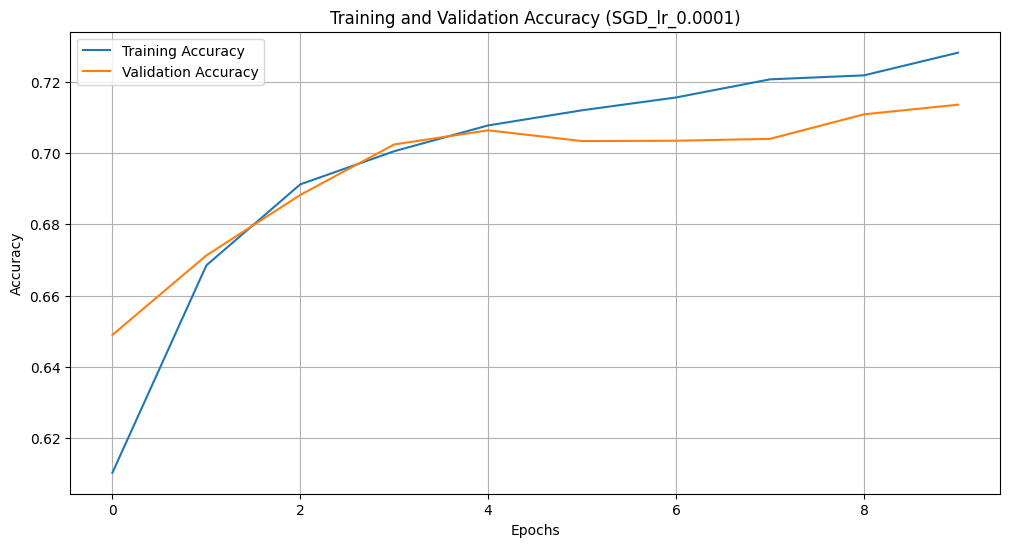

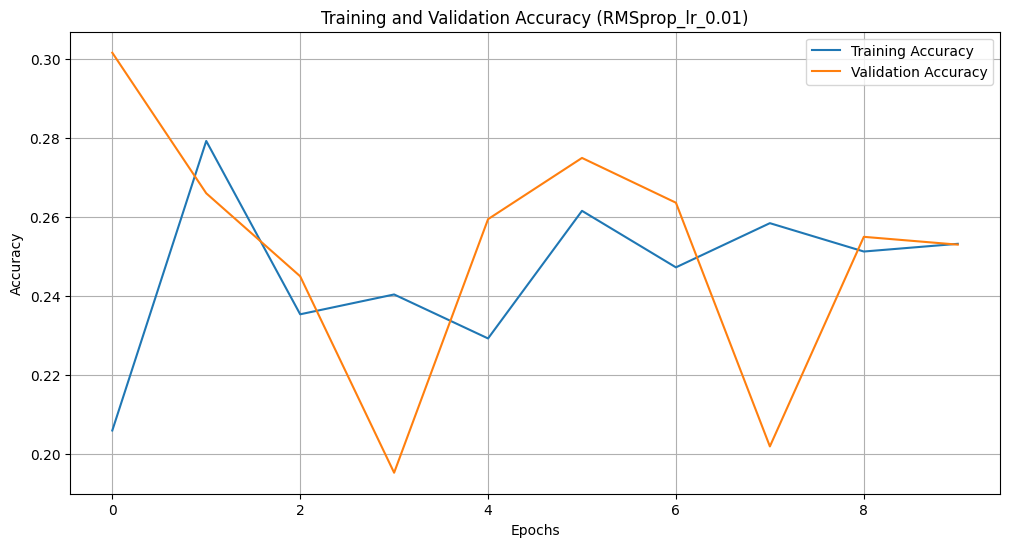

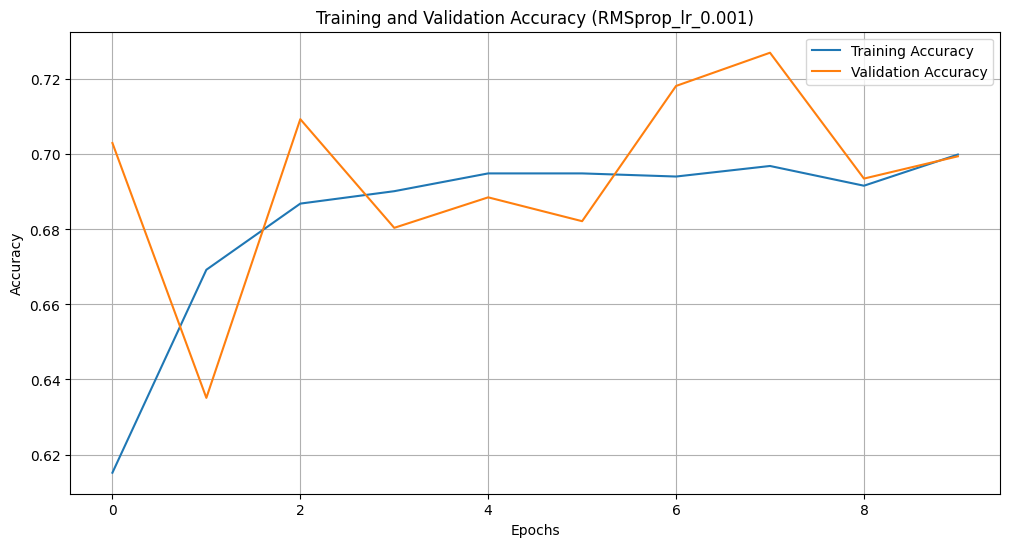

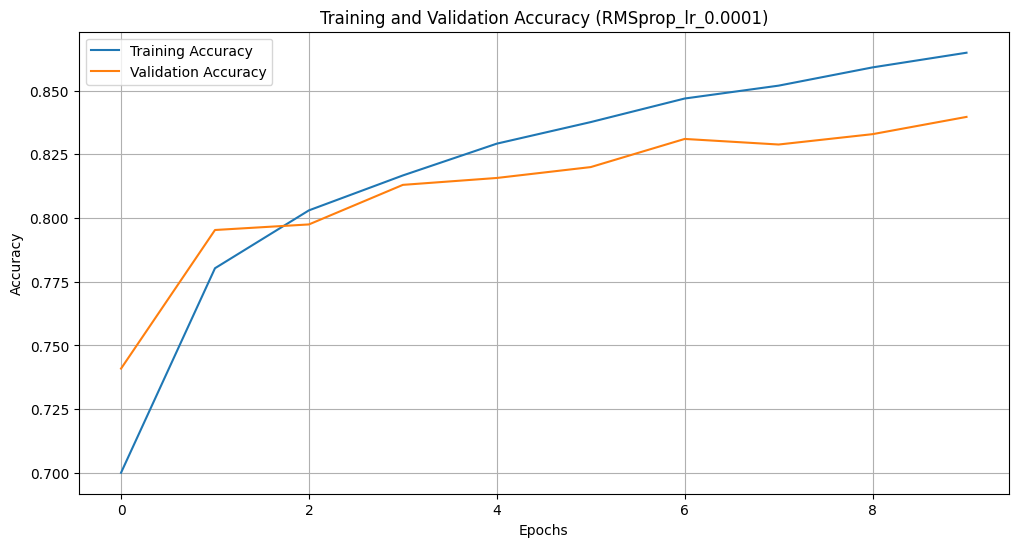

In [ ]:
# Plot the training and validation accuracy for each model individually
for optimizer in optimizers:
    for lr in learning_rates:
        key = f'{optimizer}_lr_{lr}'
        history = hist_dict[key]

        # Plot training and validation accuracy
        plt.figure(figsize=(12, 6))
        plt.plot(history['accuracy'], label=f'Training Accuracy')
        plt.plot(history['val_accuracy'], label=f'Validation Accuracy')

        plt.title(f'Training and Validation Accuracy ({key})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Evaluating model with Adam optimizer and learning rate 0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


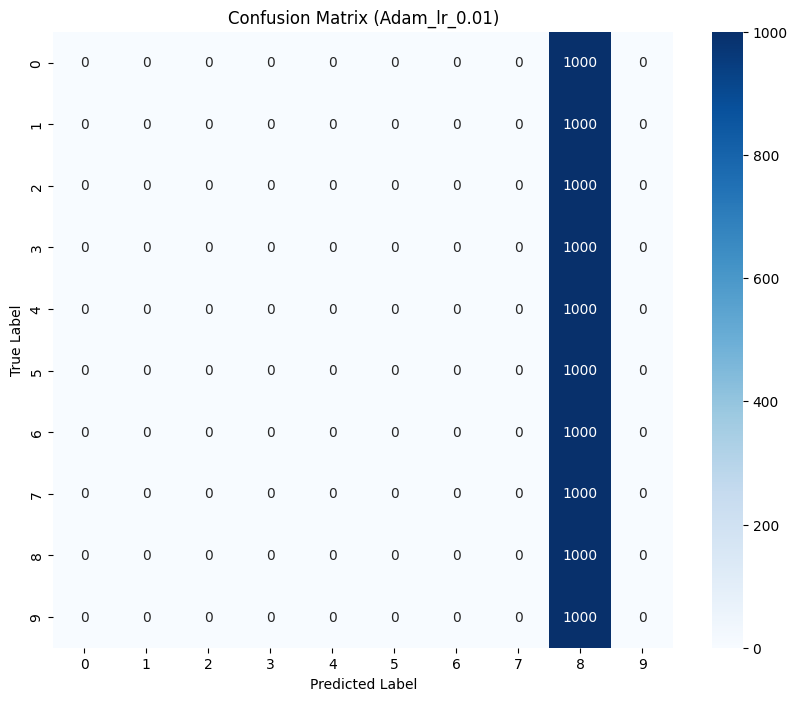

Evaluating model with Adam optimizer and learning rate 0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


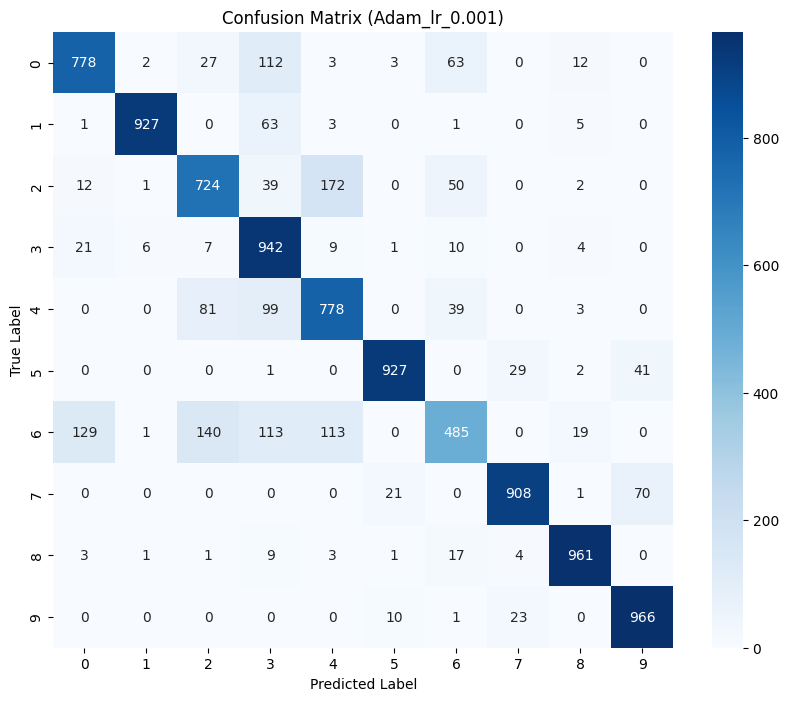

Evaluating model with Adam optimizer and learning rate 0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


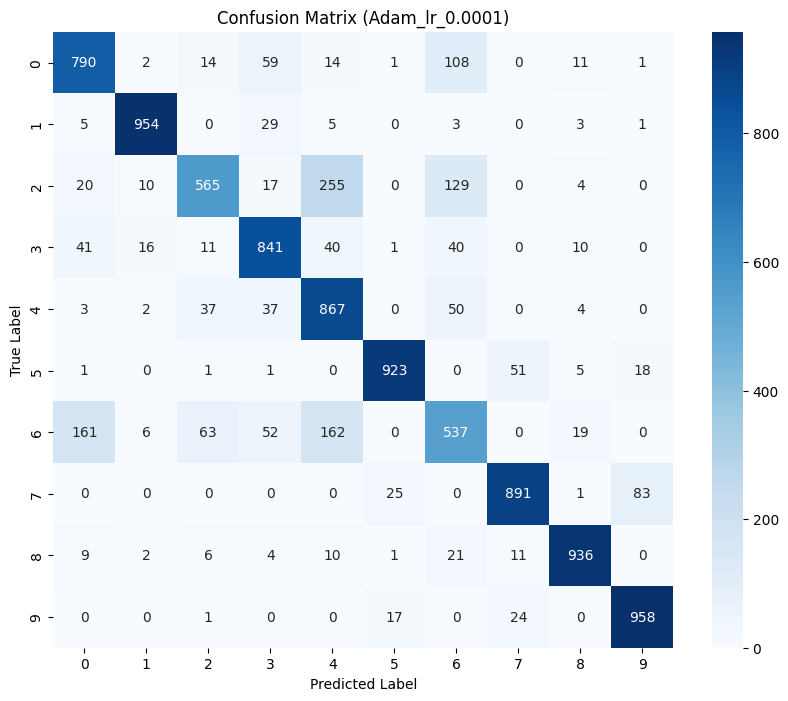

Evaluating model with SGD optimizer and learning rate 0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


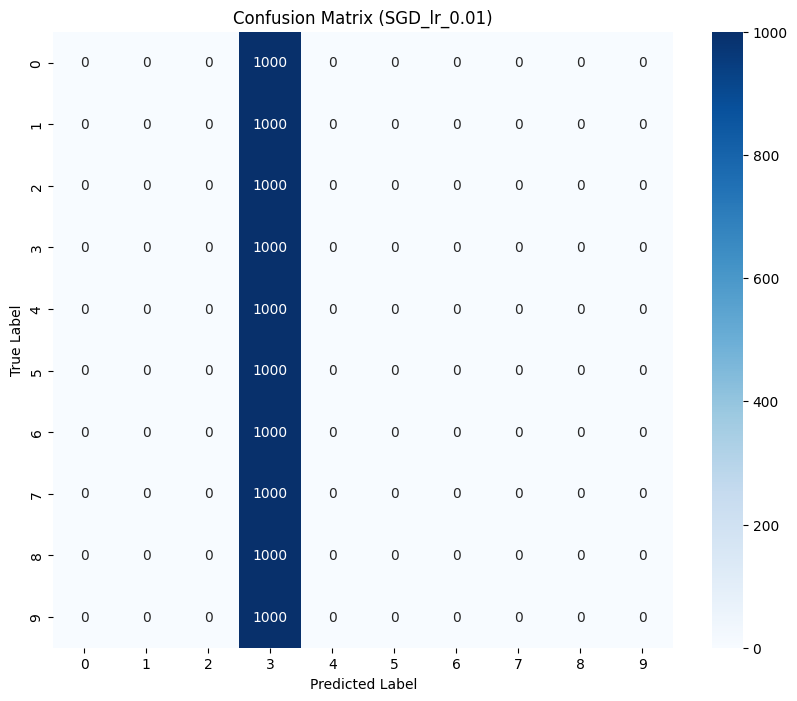

Evaluating model with SGD optimizer and learning rate 0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


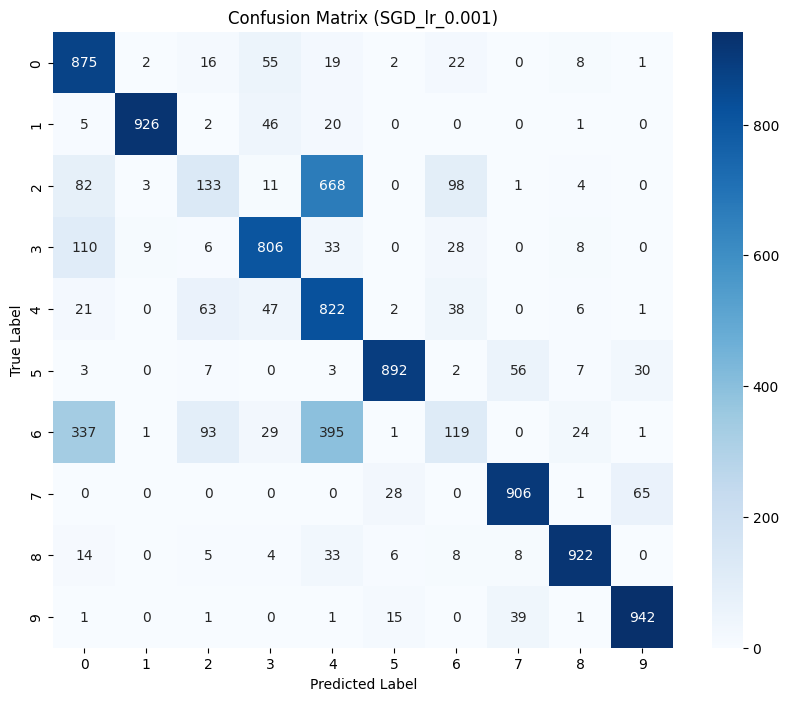

Evaluating model with SGD optimizer and learning rate 0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


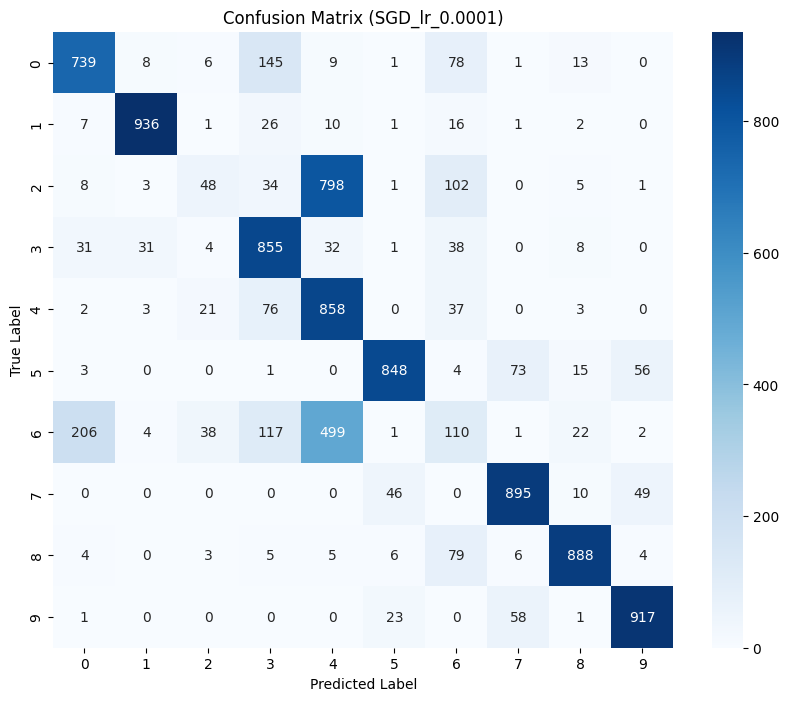

Evaluating model with RMSprop optimizer and learning rate 0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


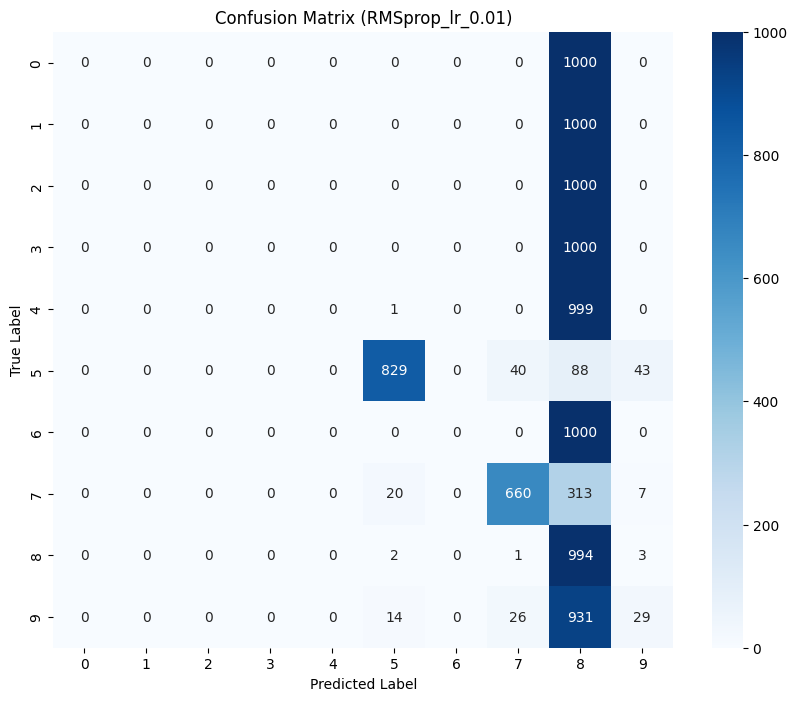

Evaluating model with RMSprop optimizer and learning rate 0.001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


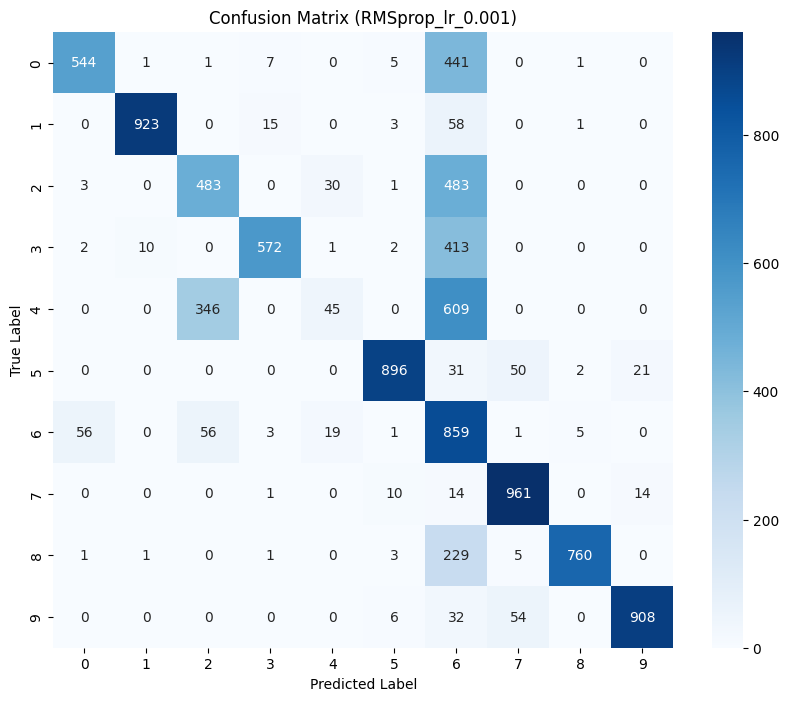

Evaluating model with RMSprop optimizer and learning rate 0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


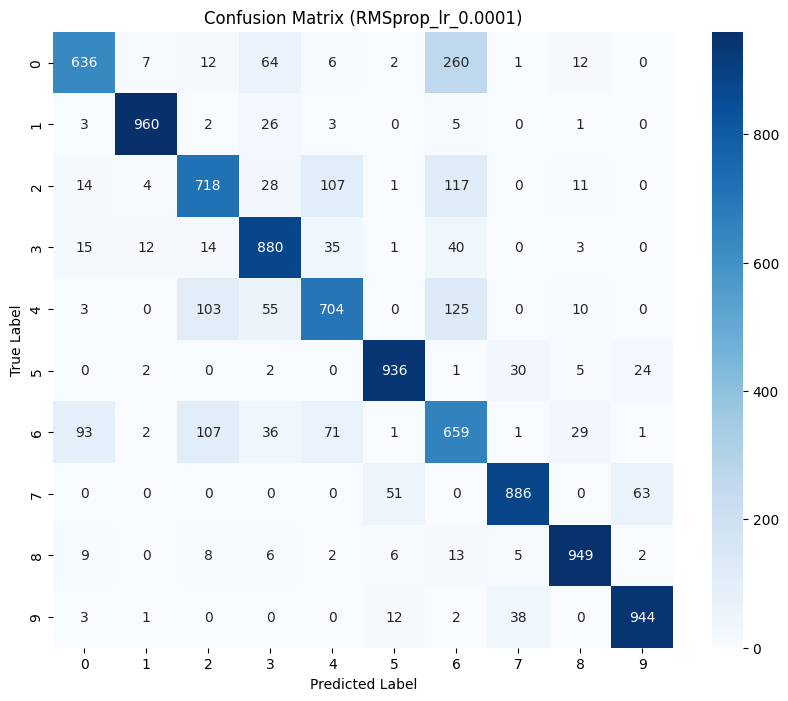

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Evaluate models and plot confusion matrix without retraining
for optimizer in optimizers:
    for lr in learning_rates:
        key = f'{optimizer}_lr_{lr}'
        print(f"Evaluating model with {optimizer} optimizer and learning rate {lr}")

        # Get the trained model from the models_dict
        model = model_dict[key]

        # Make predictions on the test set
        y_pred = model.predict(x_test)
        y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

        # Get true labels from the test set
        y_true = np.argmax(y_test, axis=1)  # True class labels

        # Plot confusion matrix
        plot_confusion_matrix(y_true, y_pred_classes, f'Confusion Matrix ({key})')

In [ ]:
from sklearn.metrics import classification_report

# Evaluate models and print classification reports
for optimizer in optimizers:
    for lr in learning_rates:
        key = f'{optimizer}_lr_{lr}'
        print(f"Evaluating model with {optimizer} optimizer and learning rate {lr}")

        # Get the trained model from the models_dict
        model = model_dict[key]

        # Make predictions on the test set
        y_pred = model.predict(x_test)
        y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

        # Get true labels from the test set
        y_true = np.argmax(y_test, axis=1)  # True class labels

        # Print classification report
        print(f"\nClassification Report ({key}):")
        print(classification_report(y_true, y_pred_classes, digits=4))



Evaluating model with Adam optimizer and learning rate 0.01
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (Adam_lr_0.01):
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1000
           1     0.0000    0.0000    0.0000      1000
           2     0.0000    0.0000    0.0000      1000
           3     0.0000    0.0000    0.0000      1000
           4     0.0000    0.0000    0.0000      1000
           5     0.0000    0.0000    0.0000      1000
           6     0.0000    0.0000    0.0000      1000
           7     0.0000    0.0000    0.0000      1000
           8     0.1000    1.0000    0.1818      1000
           9     0.0000    0.0000    0.0000      1000

    accuracy                         0.1000     10000
   macro avg     0.0100    0.1000    0.0182     10000
weighted avg     0.0100    0.1000    0.0182     10000

Evaluating model with Adam optimizer and learning rate 0.001
 93/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (Adam_lr_0.001):
              precision    recall  f1-score   support

           0     0.8242    0.7780    0.8004      1000
           1     0.9883    0.9270    0.9567      1000
           2     0.7388    0.7240    0.7313      1000
           3     0.6836    0.9420    0.7923      1000
           4     0.7197    0.7780    0.7477      1000
           5     0.9626    0.9270    0.9445      1000
           6     0.7282    0.4850    0.5822      1000
           7     0.9419    0.9080    0.9246      1000
           8     0.9524    0.9610    0.9567      1000
           9     0.8969    0.9660    0.9302      1000

    accuracy                         0.8396     10000
   macro avg     0.8437    0.8396    0.8367     10000
weighted avg     0.8437    0.8396    0.8367     10000

Evaluating model with Adam optimizer and learning rate 0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (Adam_lr_0.0001):
              pr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (SGD_lr_0.001):
              precision    recall  f1-score   support

           0     0.6043    0.8750    0.7149      1000
           1     0.9841    0.9260    0.9541      1000
           2     0.4080    0.1330    0.2006      1000
           3     0.8076    0.8060    0.8068      1000
           4     0.4122    0.8220    0.5491      1000
           5     0.9429    0.8920    0.9168      1000
           6     0.3778    0.1190    0.1810      1000
           7     0.8970    0.9060    0.9015      1000
           8     0.9389    0.9220    0.9304      1000
           9     0.9058    0.9420    0.9235      1000

    accuracy                         0.7343     10000
   macro avg     0.7279    0.7343    0.7079     10000
weighted avg     0.7279    0.7343    0.7079     10000

Evaluating model with SGD optimizer and learning rate 0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (SGD_lr_0.0001):
              preci

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (RMSprop_lr_0.001):
              precision    recall  f1-score   support

           0     0.8977    0.5440    0.6775      1000
           1     0.9872    0.9230    0.9540      1000
           2     0.5451    0.4830    0.5122      1000
           3     0.9549    0.5720    0.7154      1000
           4     0.4737    0.0450    0.0822      1000
           5     0.9666    0.8960    0.9299      1000
           6     0.2711    0.8590    0.4121      1000
           7     0.8973    0.9610    0.9281      1000
           8     0.9883    0.7600    0.8592      1000
           9     0.9629    0.9080    0.9346      1000

    accuracy                         0.6951     10000
   macro avg     0.7945    0.6951    0.7005     10000
weighted avg     0.7945    0.6951    0.7005     10000

Evaluating model with RMSprop optimizer and learning rate 0.0001
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Report (RMSprop_lr_0.0001):
       

In [ ]:
# TO DO: test on real images from interent